In [2]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data
from src.models import *
from src.trainer import Trainer
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [3]:
dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

# Train / Test

## Params

In [4]:
le_net = LeNet()

# Can use any network with ten input and two output nodes here
tail_net = TailLinear()

nb_epochs = 25
n_cv = 10 
n_cv_weight = 5

## Hyperparam opt the weight 
- Can skip and use result if using same architecture

In [4]:
weights = np.linspace(0.1, 1, 10)

In [5]:
weight_test_accuracies = np.zeros((n_cv_weight, len(weights)))

In [6]:
def hyperparam_opt(weights, n_cv_weight=5):
    for j, weight in enumerate(weights): 
    # 5 fold cross validate here 
        for i in range(n_cv_weight):
            siamese_le_net = Siamese(le_net, 
                                     target=tail_net, 
                                     weight_aux=weight)
            trainer = Trainer(nb_epochs=nb_epochs)
            trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=False)
            acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
            weight_test_accuracies[i,j] = acc_test
    avg_weight_test_accuracies = np.mean(weight_test_accuracies, axis=0)
    best_weight = weights[np.argmax(avg_weight_test_accuracies)]
    return best_weight

In [7]:
#best_weight = hyperparam_opt(weights, n_cv_weight=5)

/home/puck/coding/EE-559-Team/Project1/src/models.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = nn.functional.softmax(x)


loss_test=0.37	 acc_test=89.55
loss_test=0.71	 acc_test=88.38
loss_test=0.82	 acc_test=87.89
loss_test=0.85	 acc_test=88.77
loss_test=0.66	 acc_test=90.53
loss_test=0.75	 acc_test=90.14
loss_test=0.8	 acc_test=90.62
loss_test=1.05	 acc_test=89.75
loss_test=0.7	 acc_test=91.11
loss_test=0.81	 acc_test=90.23
loss_test=1.08	 acc_test=89.36
loss_test=1.15	 acc_test=89.75
loss_test=0.91	 acc_test=90.04
loss_test=0.43	 acc_test=88.09
loss_test=0.97	 acc_test=89.06
loss_test=1.01	 acc_test=89.94
loss_test=1.12	 acc_test=90.82
loss_test=0.83	 acc_test=90.23
loss_test=1.1	 acc_test=89.06
loss_test=0.62	 acc_test=90.23
loss_test=0.96	 acc_test=90.43
loss_test=0.86	 acc_test=91.02
loss_test=0.84	 acc_test=90.33
loss_test=0.8	 acc_test=91.11
loss_test=1.07	 acc_test=90.14
loss_test=0.96	 acc_test=90.72
loss_test=0.89	 acc_test=90.33
loss_test=1.0	 acc_test=91.31
loss_test=1.37	 acc_test=89.55
loss_test=0.93	 acc_test=91.41
loss_test=1.08	 acc_test=91.21
loss_test=1.55	 acc_test=90.62
loss_test=1.3

In [4]:
# keep best weight

In [5]:
best_weight = 0.6

In [6]:
weight_aux = best_weight

In [7]:
test_accuracies = []
train_losses = []
train_accuracies = []
validation_accuracies = []

In [8]:
for i in range(n_cv):
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=weight_aux)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses.append(loss_train)
    train_accuracies.append(acc_train)
    validation_accuracies.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies.append(acc_test)

/home/puck/coding/EE-559-Team/Project1/src/models.py:81: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = nn.functional.softmax(x)


# Epoch 1/25:	 loss=2.94	 loss_val=0.69	 acc_val=48.21
# Epoch 2/25:	 loss=1.57	 loss_val=0.66	 acc_val=66.96
# Epoch 3/25:	 loss=1.05	 loss_val=0.56	 acc_val=75.45
# Epoch 4/25:	 loss=0.78	 loss_val=0.47	 acc_val=77.23
# Epoch 5/25:	 loss=0.65	 loss_val=0.43	 acc_val=77.68
# Epoch 6/25:	 loss=0.56	 loss_val=0.45	 acc_val=81.7
# Epoch 7/25:	 loss=0.51	 loss_val=0.44	 acc_val=80.8
# Epoch 8/25:	 loss=0.44	 loss_val=0.43	 acc_val=80.8
# Epoch 9/25:	 loss=0.42	 loss_val=0.38	 acc_val=85.27
# Epoch 10/25:	 loss=0.33	 loss_val=0.38	 acc_val=86.61
# Epoch 11/25:	 loss=0.28	 loss_val=0.32	 acc_val=89.29
# Epoch 12/25:	 loss=0.25	 loss_val=0.31	 acc_val=88.84
# Epoch 13/25:	 loss=0.24	 loss_val=0.33	 acc_val=88.39
# Epoch 14/25:	 loss=0.23	 loss_val=0.35	 acc_val=88.84
# Epoch 15/25:	 loss=0.21	 loss_val=0.33	 acc_val=91.52
# Epoch 16/25:	 loss=0.16	 loss_val=0.37	 acc_val=88.39
# Epoch 17/25:	 loss=0.13	 loss_val=0.33	 acc_val=90.18
# Epoch 18/25:	 loss=0.11	 loss_val=0.49	 acc_val=87.5
# Epo

# Epoch 21/25:	 loss=0.01	 loss_val=0.68	 acc_val=91.07
# Epoch 22/25:	 loss=0.01	 loss_val=0.69	 acc_val=91.07
# Epoch 23/25:	 loss=0.01	 loss_val=0.69	 acc_val=90.62
# Epoch 24/25:	 loss=0.01	 loss_val=0.69	 acc_val=90.62
# Epoch 25/25:	 loss=0.01	 loss_val=0.72	 acc_val=90.18
loss_test=0.66	 acc_test=89.94
# Epoch 1/25:	 loss=0.03	 loss_val=1.11	 acc_val=88.39
# Epoch 2/25:	 loss=0.02	 loss_val=1.03	 acc_val=87.05
# Epoch 3/25:	 loss=0.18	 loss_val=0.62	 acc_val=90.18
# Epoch 4/25:	 loss=0.14	 loss_val=0.61	 acc_val=89.73
# Epoch 5/25:	 loss=0.06	 loss_val=0.65	 acc_val=88.84
# Epoch 6/25:	 loss=0.02	 loss_val=0.73	 acc_val=87.95
# Epoch 7/25:	 loss=0.03	 loss_val=0.7	 acc_val=88.84
# Epoch 8/25:	 loss=0.03	 loss_val=0.65	 acc_val=87.95
# Epoch 9/25:	 loss=0.02	 loss_val=0.7	 acc_val=88.39
# Epoch 10/25:	 loss=0.02	 loss_val=0.74	 acc_val=87.95
# Epoch 11/25:	 loss=0.01	 loss_val=0.76	 acc_val=87.95
# Epoch 12/25:	 loss=0.01	 loss_val=0.78	 acc_val=87.95
# Epoch 13/25:	 loss=0.01	 l

In [9]:
avg_test_acc = np.mean(test_accuracies)
print('avg test acc', avg_test_acc)
stdev_test_acc = np.std(test_accuracies)
print('stdev test acc', stdev_test_acc)

avg test acc 90.00999999999999
stdev test acc 0.9540335423872688


In [10]:
import numpy as np 
train_losses = np.mean(np.array(train_losses), axis=0)
train_accuracies = np.mean(np.array(train_accuracies), axis=0)
validation_accuracies = np.mean(np.array(validation_accuracies), axis=0)

In [11]:
from src.utils import plot_training_epochs

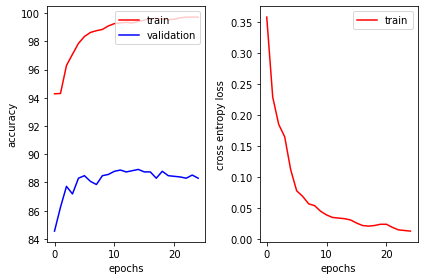

In [12]:
plt = plot_training_epochs(nb_epochs, train_losses, train_accuracies, validation_accuracies)